In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

from tqdm.notebook import tqdm
from glob import glob

%matplotlib inline

In [2]:
train = pd.read_csv("./training_set/class_dict.csv")

In [3]:
rgb = train[[' r', ' g', ' b']].values
rgb

array([[  0,   0,   0],
       [128,  64, 128],
       [130,  76,   0],
       [  0, 102,   0],
       [112, 103,  87],
       [ 28,  42, 168],
       [ 48,  41,  30],
       [  0,  50,  89],
       [107, 142,  35],
       [ 70,  70,  70],
       [102, 102, 156],
       [254, 228,  12],
       [254, 148,  12],
       [190, 153, 153],
       [153, 153, 153],
       [255,  22,  96],
       [102,  51,   0],
       [  9, 143, 150],
       [119,  11,  32],
       [ 51,  51,   0],
       [190, 250, 190],
       [112, 150, 146],
       [  2, 135, 115],
       [255,   0,   0]], dtype=int64)

In [4]:
img = cv2.imread("./training_set/labels/001.png")
img = cv2.resize(img,(448,448),interpolation=cv2.INTER_NEAREST)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

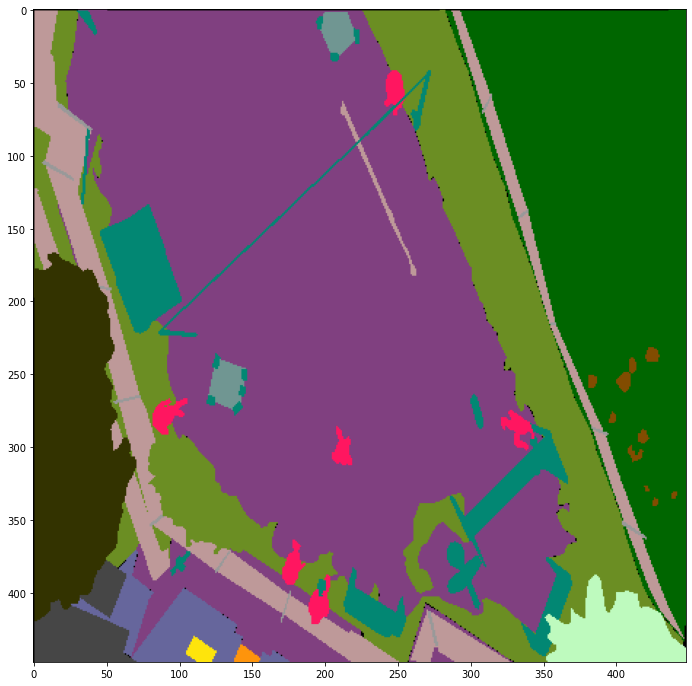

In [5]:
plt.figure(figsize=(12,12))
plt.imshow(img)

In [6]:
def app(x):
    return (np.square(rgb  - np.array(x))).mean(axis=1).argmin()

In [7]:
r = img.reshape(-1,3)
r = np.apply_along_axis(app,1,r) 

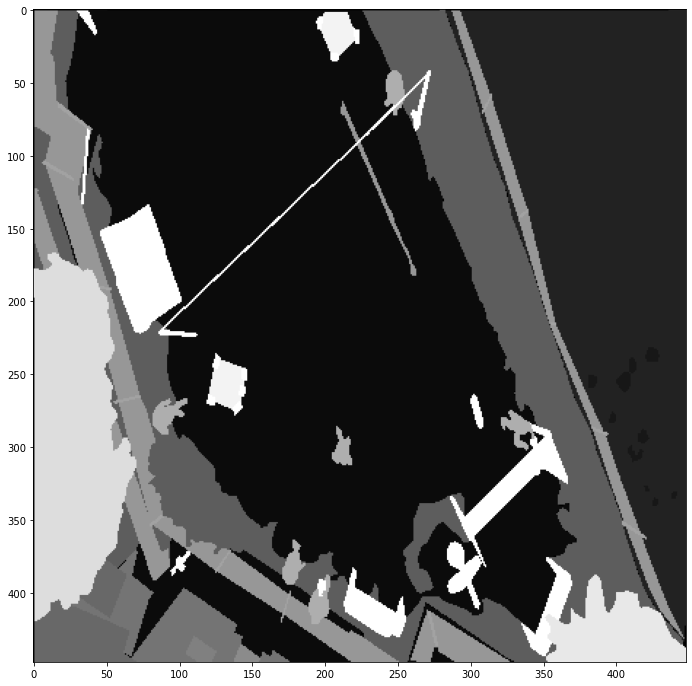

In [8]:
plt.figure(figsize=(12,12))
plt.imshow(r.reshape(448,448),cmap="gray")

In [12]:
images,labels = [],[]

for i in tqdm(glob("training_set\\images\\*")):
    image = cv2.resize(cv2.imread(i),(256,256))
    label = cv2.resize(cv2.imread(i.replace("images","labels").replace("jpg","png")),(256,256))
    
    images.append(image)
    labels.append(label)
    
images = np.array(images)
labels = np.array(labels)

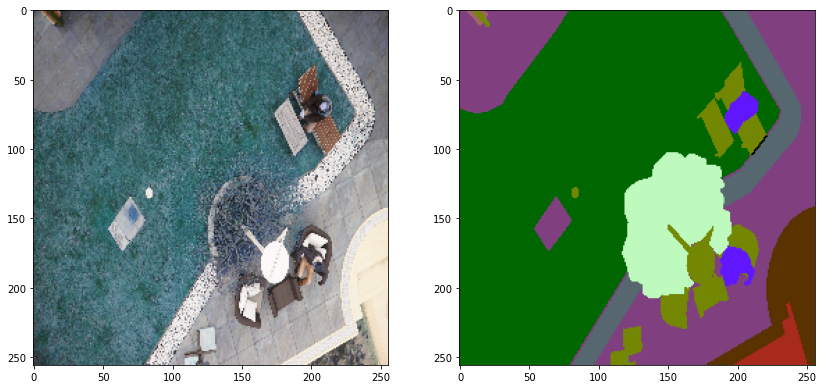

In [13]:
fig,axes = plt.subplots(1,2,figsize=(14,7))

i = np.random.randint(0,len(images))
axes[0].imshow(images[i])
axes[1].imshow(labels[i])

In [21]:
encoded = []

def enc(x):
    i = (np.square(rgb  - np.array(x))).mean(axis=1).argmin()
    e = np.zeros((24,))
    e[i] = 1
    return e

for label in tqdm(labels):
    flat = label.reshape(-1,3)
    encode =  np.apply_along_axis(enc,1,flat).reshape(256,256,24)
    encoded.append(encode)
    
encoded = np.array(encoded)

In [27]:
encoded = encoded.astype(np.uint8)

In [28]:
import gc

In [29]:
gc.collect()

0

In [31]:
np.save("train/images.npy",images)
np.save("train/labels.npy",labels)
np.save("train/encoded.npy",encoded)